PROYECTO FINAL: Analisis exploratorio de datos sobre el dataser de partidas de ajedres

ABSTRACT
Este proyecto se enfoca en realizar un análisis exploratorio de datos sobre un conjunto de datos de partidas de ajedrez. El objetivo principal es descubrir patrones subyacentes en los movimientos de diferentes jugadas que conduzcan a la victoria, explorando cómo estos patrones se relacionan con diversos factores como el color de las fichas, el tipo de apertura, entre otros. Para lograr este propósito, se emplearán técnicas de visualización y resúmenes estadísticos con el fin de profundizar en la comprensión de los datos y responder a preguntas clave planteadas sobre este conjunto de datos en particular. Además, se evaluarán las posibles aplicaciones de modelos de aprendizaje automático para predecir resultados de partidas de ajedrez basados en las características observadas.

El análisis exploratorio de datos se llevará a cabo de manera exhaustiva, comenzando por la exploración inicial de las características disponibles en el conjunto de datos. Se examinarán variables como el número de movimientos, las jugadas más comunes, las aperturas más utilizadas y las distribuciones de victorias por color de las fichas. Esta fase de exploración permitirá identificar tendencias y relaciones preliminares entre las diferentes variables, proporcionando una base sólida para análisis más detallados.

Además de explorar los datos de manera descriptiva, se realizarán análisis comparativos entre grupos de datos para comprender mejor la influencia de ciertas variables en los resultados de las partidas. Por ejemplo, se podrían comparar las distribuciones de movimientos entre partidas ganadas por blancas y partidas ganadas por negras para identificar diferencias significativas en las estrategias utilizadas por cada color. Asimismo, se analizará cómo varía la efectividad de diferentes aperturas según el color de las fichas, examinando si algunas aperturas tienden a ser más exitosas para un color en particular.

Además del análisis exploratorio, se explorarán posibles modelos de aprendizaje automático que puedan predecir el resultado de una partida de ajedrez dados ciertos parámetros iniciales, como la apertura utilizada y el color de las fichas. Se evaluará la idoneidad de diferentes algoritmos de aprendizaje automático para este propósito y se ajustarán los modelos para optimizar su rendimiento predictivo.

En resumen, este proyecto busca desentrañar los secretos ocultos en los datos de partidas de ajedrez a través de un análisis detallado y exhaustivo, con el objetivo final de desarrollar modelos predictivos que puedan proporcionar información valiosa sobre los resultados de las partidas. Los hallazgos obtenidos podrían tener aplicaciones prácticas en la mejora del juego estratégico de los jugadores de ajedrez y en la creación de sistemas de asistencia para la toma de decisiones durante las partidas.

PREGUNTAS E HIPOTESIS DE INTERES

1. Cuál es la distribución del número de turnos en las partidas de ajedrez?
2. Existe alguna relacion entre victoria y color elegido?
3. Hay una tendencia en partidas ganadas segun el tipo de apertura?

In [46]:
import pandas as pd
GAMES = pd.read_csv('games.csv')
GAMES[GAMES['winner'].str.contains('draw')]
GAMES.head()


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [35]:
from collections import Counter
import numpy as np
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool

Este gráfico mostrará la distribución del número de turnos en las partidas de ajedrez, lo que puede ayudar a comprender la duración típica de las partidas y si hay alguna tendencia hacia partidas más cortas o más largas.

In [13]:

# Creamos Histograma del número de turnos
hist, edges = np.histogram(GAMES['turns'], bins=20)

# Crear la figura
p1 = figure(title="Distribución del número de turnos en las partidas de ajedrez", 
            x_axis_label='Número de Turnos', y_axis_label='Frecuencia')
p1.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color="blue", line_color="white", alpha=0.5)

 # Agregar herramienta de información al pasar el cursor
p1.add_tools(HoverTool(tooltips=[("Frecuencia", "@top")])) 

# Mostrar el grafico
show(p1)

La visualización que hemos creado nos permite explorar la relación entre la victoria en las partidas de ajedrez y el color de las piezas elegido por los jugadores. Al observar el gráfico, podemos analizar la distribución de las victorias entre las piezas blancas y negras. Si hay una relación entre la victoria y el color de las piezas elegido, esperaríamos ver una diferencia notable en la altura de las barras correspondientes a "blancas ganan" y "negras ganan". Una barra significativamente más alta indicaría que ese color de piezas tiene más probabilidades de resultar en una victoria.

In [36]:
from bokeh.palettes import Spectral6

# Contar la frecuencia de cada resultado de partida
count = GAMES['winner'].value_counts()

# Crear ColumnDataSource con los datos
source =ColumnDataSource(data={'winner':count.index, 'count':count.values , 'color':Spectral6[:3]})

# Crear la figura
p = figure(x_range= count.index.tolist(), title="Resultado de las partidas", x_axis_label='Color de las piezas', y_axis_label='Frecuencia')

# Graficar las barras verticales
p.vbar(x='winner', top= 'count' , width= 0.7, legend_field= "winner", source= source, color='color')

# Configurar los labels del grafico
p.xaxis.axis_label = "Resultado Partida"
p.yaxis.axis_label = "Frecuencia"

# Configurar la legenda
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

# Agregar herramienta de información al pasar el cursor
hover = HoverTool()
hover.tooltips = [("Resultado", "@winner"), ("Frecuencia", "@count")]
p.add_tools(hover)

# Mostrar el grafico
show(p)

Este gráfico mostrará las aperturas más utilizadas en las partidas de ajedrez, lo que puede proporcionar información sobre las estrategias preferidas por los jugadores. Además, se pueden segmentar las aperturas por el color de las piezas para analizar las diferencias en las estrategias de apertura entre los jugadores blancos y negros.

In [51]:
# Contar la frecuencia de cada apertura
opening_counts = GAMES['opening_name'].value_counts().head(10)

# Crear ColumnDataSource con los datos
source = ColumnDataSource(data={'opening_name': opening_counts.index.tolist(),
                                 'count': opening_counts.values.tolist()})

# Crear la figura
p = figure(y_range=opening_counts.index.tolist(),
           title="Aperturas más Populares", y_axis_label="Apertura", x_axis_label="Frecuencia")

# Graficar las barras horizontales
p.hbar(y='opening_name', right='count',width=0.4, height=0.5, source=source, color='blue')

# Agregar herramienta de información al pasar el cursor
hover = HoverTool()
hover.tooltips = [("Apertura", "@opening_name"), ("Frecuencia", "@count")]
p.add_tools(hover)

# Configurar la leyenda
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

# Mostrar el gráfico
show(p)


C:\Users\abril\AppData\Local\Temp\ipykernel_2512\2689207539.py:21: UserWarning: 
You are attempting to set `plot.legend.orientation` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  p.legend.orientation = "horizontal"
C:\Users\abril\AppData\Local\Temp\ipykernel_2512\2689207539.py:22: UserWarning: 
You are attempting to set `plot.legend.location` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  p.legend.location = "top_center"


In [25]:


# Obtener las variables dummy para la columna 'winner' con prefijo 'winner'
winner_dummies = pd.get_dummies(GAMES['winner'], prefix='winner')
df_encoded = pd.get_dummies(GAMES[['opening_name']], columns=['opening_name'])
df1= GAMES
df1 = pd.concat([df1, winner_dummies],axis=1)
df1.drop(columns=['winner'])
df_encoded

,opening_name_Alekhine Defense,opening_name_Alekhine Defense #2,opening_name_Alekhine Defense #3,opening_name_Alekhine Defense: Balogh Variation,opening_name_Alekhine Defense: Brooklyn Variation,opening_name_Alekhine Defense: Exchange Variation,opening_name_Alekhine Defense: Four Pawns Attack,opening_name_Alekhine Defense: Four Pawns Attack | 6...Nc6,opening_name_Alekhine Defense: Four Pawns Attack | Fianchetto Variation,opening_name_Alekhine Defense: Four Pawns Attack | Main Line,...,opening_name_Zukertort Opening: Quiet System,opening_name_Zukertort Opening: Reversed Mexican Defense,opening_name_Zukertort Opening: Ross Gambit,opening_name_Zukertort Opening: Santasiere's Folly,opening_name_Zukertort Opening: Sicilian Invitation,opening_name_Zukertort Opening: Slav Invitation,opening_name_Zukertort Opening: Tennison Gambit,opening_name_Zukertort Opening: The Walrus,opening_name_Zukertort Opening: Vos Gambit,opening_name_Zukertort Opening: Wade Defense
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20054,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20055,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20056,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Cargar los datos y preparar las características (X) y la variable objetivo (y)
# Supongamos que tienes un DataFrame df con tus datos
X = df_encoded  # características
y = GAMES['winner']  # variable objetivo

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de Regresión Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Predecir los resultados en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de Regresión Logística:", accuracy)


Precisión del modelo de Regresión Logística: 0.5201894317048853


In [28]:
# Suponiendo que ya tienes el modelo entrenado (model) y los datos de prueba (X_test)

# Realizar predicciones sobre los datos de prueba
y_pred = model.predict(X_test)

# Comparar las predicciones con las etiquetas reales
for i in range(len(y_pred)):
    print("Predicción:", y_pred[i], " - Etiqueta real:", y_test.iloc[i])

# También puedes calcular la precisión del modelo en los datos de prueba
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo en los datos de prueba:", accuracy)


Predicción: white  - Etiqueta real: white
Predicción: white  - Etiqueta real: black
Predicción: white  - Etiqueta real: black
Predicción: white  - Etiqueta real: white
Predicción: black  - Etiqueta real: white
Predicción: white  - Etiqueta real: black
Predicción: white  - Etiqueta real: white
Predicción: black  - Etiqueta real: black
Predicción: black  - Etiqueta real: black
Predicción: white  - Etiqueta real: black
Predicción: black  - Etiqueta real: black
Predicción: white  - Etiqueta real: black
Predicción: black  - Etiqueta real: white
Predicción: black  - Etiqueta real: black
Predicción: black  - Etiqueta real: white
Predicción: black  - Etiqueta real: black
Predicción: black  - Etiqueta real: black
Predicción: white  - Etiqueta real: black
Predicción: white  - Etiqueta real: black
Predicción: black  - Etiqueta real: white
Predicción: white  - Etiqueta real: black
Predicción: white  - Etiqueta real: white
Predicción: white  - Etiqueta real: black
Predicción: white  - Etiqueta real

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Inicializar el modelo de Bosques Aleatorios
rf_model = RandomForestClassifier(random_state=42)

# Entrenar el modelo utilizando los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Realizar predicciones sobre los datos de prueba
y_pred_rf = rf_model.predict(X_test)

# Comparar las predicciones con las etiquetas reales
for i in range(len(y_pred_rf)):
    print("Predicción:", y_pred_rf[i], " - Etiqueta real:", y_test.iloc[i])

# Calcular la precisión del modelo en los datos de prueba
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Precisión del modelo de Bosques Aleatorios en los datos de prueba:", accuracy_rf)


Predicción: white  - Etiqueta real: white
Predicción: black  - Etiqueta real: black
Predicción: white  - Etiqueta real: black
Predicción: white  - Etiqueta real: white
Predicción: black  - Etiqueta real: white
Predicción: white  - Etiqueta real: black
Predicción: white  - Etiqueta real: white
Predicción: black  - Etiqueta real: black
Predicción: black  - Etiqueta real: black
Predicción: white  - Etiqueta real: black
Predicción: black  - Etiqueta real: black
Predicción: white  - Etiqueta real: black
Predicción: black  - Etiqueta real: white
Predicción: black  - Etiqueta real: black
Predicción: black  - Etiqueta real: white
Predicción: black  - Etiqueta real: black
Predicción: black  - Etiqueta real: black
Predicción: white  - Etiqueta real: black
Predicción: black  - Etiqueta real: black
Predicción: black  - Etiqueta real: white
Predicción: white  - Etiqueta real: black
Predicción: white  - Etiqueta real: white
Predicción: white  - Etiqueta real: black
Predicción: black  - Etiqueta real

ANALISIS EXPLORATORIO DE LOS DATOS

In [53]:
import pandas as pd
GAMES = pd.read_csv('games.csv')
GAMES[GAMES['winner'].str.contains('draw')].head(1)




,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
5,MsoDV9wj,False,1.504240e+12,1.504240e+12,5,draw,draw,10+0,trelynn17,1250,franklin14532,1002,e4 c5 Nf3 Qa5 a3,B27,Sicilian Defense: Mongoose Variation,4


La primera medida va ser pasar los datos que nos interesen que esten en formato string a numericos, para asi poder usar modelos de machine learning que puedan trabajar con ellos.

In [54]:
## Rated = 1, Not rated = 0
import numpy as np
GAMES['rated_bin'] = np.where(GAMES['rated'] == True, 1, 0)


Los campos 'created_at' y 'last_move_at' estan en formato unix, lo llevaremos a un formato de fecha donde sea mas comprensible leer.

In [55]:
# Se agregan dos columnas donde en vez de tenerlo en formato segundos desde 1970(unix) los tendremos en fecha y hora
GAMES['created_at_dt'] = pd.to_datetime(GAMES['created_at']/1000, 
                                        unit='s', 
                                        origin='unix')

GAMES['last_move_at_dt'] = pd.to_datetime(GAMES['last_move_at']/1000, 
                                          unit='s', 
                                          origin='unix')

In [73]:
GAMES.head(2)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,rated_bin,winner_bin,created_at_dt,last_move_at_dt
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,0,1,2017-08-31 20:06:40,2017-08-31 20:06:40
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,1,0,2017-08-30 21:53:20,2017-08-30 21:53:20


Una vez creado el campo fecha, haremos la diferencia entre el final y el comienzo de la partida para obtener asi el tiempo en minutos. Ademas de aportarnos datos mas entendibles nos dan valores mas bajos o normalizados.

In [56]:
GAMES['game_len_dt'] = GAMES['last_move_at_dt'] - GAMES['created_at_dt']

GAMES['game_len'] = GAMES['last_move_at'] - GAMES['created_at']

GAMES['game_len_mins'] = GAMES['game_len'].apply(lambda x: round(x / 1000 / 60, 2))

In [77]:
GAMES.tail()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,...,opening_eco,opening_name,opening_ply,rated_bin,winner_bin,created_at_dt,last_move_at_dt,game_len_dt,game_len,game_len_mins
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,...,A80,Dutch Defense,2,1,1,2017-07-11 16:35:14.342000008,2017-07-11 16:40:36.075999975,0 days 00:05:21.733999967,321734.0,5.36
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,...,A41,Queen's Pawn,2,1,0,2017-07-10 14:48:09.759999990,2017-07-10 15:00:33.979000092,0 days 00:12:24.219000102,744219.0,12.40
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,...,D00,Queen's Pawn Game: Mason Attack,3,1,1,2017-07-10 14:44:37.493000031,2017-07-10 14:47:30.326999903,0 days 00:02:52.833999872,172834.0,2.88
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,...,B07,Pirc Defense,4,1,1,2017-07-10 14:15:27.019000053,2017-07-10 14:31:13.717999935,0 days 00:15:46.698999882,946699.0,15.78
20057,N8G2JHGG,True,1.499643e+12,1.499644e+12,78,mate,black,10+0,jamboger,1235,...,D00,Queen's Pawn Game: Mason Attack,3,1,0,2017-07-09 23:32:32.648999929,2017-07-09 23:44:49.348000050,0 days 00:12:16.699000121,736699.0,12.28


Rating distance sera la diferencia entre el rango/puntos que tiene cada jugador enfrentado, antes de empezar la partida.

In [57]:
GAMES['rating_distance'] = GAMES['white_rating'] - GAMES['black_rating']
GAMES['rating_distance'] = GAMES['rating_distance'].apply(abs)

In [58]:
# Codificar one-hot la variable 'victory_status' y convertirla en un DataFrame
VICTORY_STATUS = pd.get_dummies(GAMES['victory_status'])

# Renombrar las columnas para mayor claridad
VICTORY_STATUS.columns = ['victory_status_draw', 'victory_status_mate', 'victory_status_outoftime', 'victory_status_resign']

# Fusionar el DataFrame codificado con el DataFrame original
GAMES = pd.concat([GAMES.drop('victory_status', axis=1), VICTORY_STATUS], axis=1)

GAMES.head(3)


,id,rated,created_at,last_move_at,turns,winner,increment_code,white_id,white_rating,black_id,...,created_at_dt,last_move_at_dt,game_len_dt,game_len,game_len_mins,rating_distance,victory_status_draw,victory_status_mate,victory_status_outoftime,victory_status_resign
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,white,15+2,bourgris,1500,a-00,...,2017-08-31 20:06:40.000000000,2017-08-31 20:06:40.000000000,0 days 00:00:00,0.0,0.00,309,False,False,True,False
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,black,5+10,a-00,1322,skinnerua,...,2017-08-30 21:53:20.000000000,2017-08-30 21:53:20.000000000,0 days 00:00:00,0.0,0.00,61,False,False,False,True
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,white,5+10,ischia,1496,a-00,...,2017-08-30 21:53:20.000000000,2017-08-30 21:53:20.000000000,0 days 00:00:00,0.0,0.00,4,False,True,False,False
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,white,20+0,daniamurashov,1439,adivanov2009,...,2017-08-30 16:20:00.000000000,2017-08-30 16:20:00.000000000,0 days 00:00:00,0.0,0.00,15,False,True,False,False
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,white,30+3,nik221107,1523,adivanov2009,...,2017-08-29 18:06:40.000000000,2017-08-29 18:06:40.000000000,0 days 00:00:00,0.0,0.00,54,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,white,10+10,belcolt,1691,jamboger,...,2017-07-11 16:35:14.342000008,2017-07-11 16:40:36.075999975,0 days 00:05:21.733999967,321734.0,5.36,471,False,False,False,True
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,black,10+0,jamboger,1233,farrukhasomiddinov,...,2017-07-10 14:48:09.759999990,2017-07-10 15:00:33.979000092,0 days 00:12:24.219000102,744219.0,12.40,37,False,True,False,False
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,white,10+0,jamboger,1219,schaaksmurf3,...,2017-07-10 14:44:37.493000031,2017-07-10 14:47:30.326999903,0 days 00:02:52.833999872,172834.0,2.88,67,False,True,False,False
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,white,10+0,marcodisogno,1360,jamboger,...,2017-07-10 14:15:27.019000053,2017-07-10 14:31:13.717999935,0 days 00:15:46.698999882,946699.0,15.78,133,False,False,False,True


In [59]:
# Se llevo los datos de la columna winner a enteros: 0 = White , 1 = Black , 2 = Draw
GAMES['winner_num'] = GAMES['winner'].apply(lambda x: 0 if x=='white' else('1' if x=='black' else 2))



In [60]:
from sklearn.preprocessing import LabelEncoder

# Supongamos que tienes una lista de nombres de aperturas
openings = GAMES['opening_name']

# Instancia el LabelEncoder
label_encoder = LabelEncoder()

# Ajusta el LabelEncoder a los nombres de aperturas y transforma los nombres en números
encoded_openings = label_encoder.fit_transform(openings)

encoded_openings = pd.Series(data=encoded_openings , name='encoded_openings')
# Muestra los nombres de aperturas originales y sus correspondientes códigos
for opening, code in zip(openings, encoded_openings):
    print(f"{opening}: {code}")

encoded_openings

Slav Defense: Exchange Variation: 1387
Nimzowitsch Defense: Kennedy Variation: 750
King's Pawn Game: Leonardis Variation: 650
Queen's Pawn Game: Zukertort Variation: 992
Philidor Defense: 783
Sicilian Defense: Mongoose Variation: 1292
Blackmar-Diemer Gambit: Pietrowsky Defense: 91
Nimzowitsch Defense: Kennedy Variation |  Linksspringer Variation: 752
Italian Game: Schilling-Kostic Gambit: 503
Scandinavian Defense: Mieses-Kotroc Variation: 1141
Van't Kruijs Opening: 1433
French Defense: Advance Variation |  Paulsen Attack: 323
French Defense: Knight Variation: 352
French Defense #2: 311
Four Knights Game: Italian Variation: 297
Italian Game: Two Knights Defense |  Knight Attack: 518
Four Knights Game: Italian Variation: 297
Four Knights Game: Italian Variation: 297
Philidor Defense #3: 785
Queen's Pawn Game: 961
Italian Game: Anti-Fried Liver Defense: 463
Horwitz Defense: 433
Sicilian Defense: Bowdler Attack: 1208
English Opening: King's English Variation |  Reversed Closed Sicilian: 25

0        1387
1         750
2         650
3         992
4         783
         ... 
20053     191
20054     960
20055     977
20056     806
20057     977
Name: encoded_openings, Length: 20058, dtype: int32

In [61]:
# Fusionar el DataFrame codificado con el DataFrame original
GAMES = pd.concat([GAMES,encoded_openings ], axis=1)
GAMES.head(2)

,id,rated,created_at,last_move_at,turns,winner,increment_code,white_id,white_rating,black_id,...,game_len_dt,game_len,game_len_mins,rating_distance,victory_status_draw,victory_status_mate,victory_status_outoftime,victory_status_resign,winner_num,encoded_openings
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,white,15+2,bourgris,1500,a-00,...,0 days,0.0,0.0,309,False,False,True,False,0,1387
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,black,5+10,a-00,1322,skinnerua,...,0 days,0.0,0.0,61,False,False,False,True,1,750


In [62]:
# Se eliminan las columnas que no tienen importancia en el estudio de datos
GAMES.drop(columns=['created_at' , 'last_move_at', 'id', 'black_id' , 'white_id', 'created_at_dt','last_move_at_dt','game_len_dt', 'opening_eco','winner','rated','game_len','increment_code','opening_name'], inplace=True)


In [160]:
GAMES.drop(columns=['moves']).head(3)

,turns,white_rating,black_rating,opening_ply,rated_bin,game_len_mins,rating_distance,victory_status_draw,victory_status_mate,victory_status_outoftime,victory_status_resign,winner_num,encoded_openings
0,13,1500,1191,5,0,0.0,309,False,False,True,False,0,1387
1,16,1322,1261,4,1,0.0,61,False,False,False,True,1,750
2,61,1496,1500,3,1,0.0,4,False,True,False,False,0,650


In [43]:
GAMES[['white_rating','black_rating','winner_num']].head(3)

,white_rating,black_rating,winner_num
0,1500,1191,0
1,1322,1261,1
2,1496,1500,0


In [ ]:
#NO EJECUTAR(no anda, se hace lo mismo abajo)
GAMES['winner_rating'] = GAMES[['white_rating','black_rating','winner_num']].apply(lambda x: x['white_rating'] if x['winner_num']== 0 else( x['black_rating'] if x['winner_num']== 1 else (x['black_rating'] + x['white_rating'])/2 ))

In [63]:
import numpy as np

GAMES['winner_rating'] = np.where(GAMES['winner_num'] == 0, GAMES['white_rating'], 
                                  np.where(GAMES['winner_num'] == 1, GAMES['black_rating'], 
                                           (GAMES['black_rating'] + GAMES['white_rating']) / 2))


In [64]:
GAMES.head(2)

,turns,white_rating,black_rating,moves,opening_ply,rated_bin,game_len_mins,rating_distance,victory_status_draw,victory_status_mate,victory_status_outoftime,victory_status_resign,winner_num,encoded_openings,winner_rating
0,13,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,5,0,0.0,309,False,False,True,False,0,1387,1500.0
1,16,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,4,1,0.0,61,False,False,False,True,1,750,1291.5


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X = GAMES[['victory_status_draw','victory_status_mate', 'victory_status_outoftime', 'victory_status_resign']]
y = GAMES['rating_distance']

X_train ,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


# Crear un objeto StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba
X_test_scaled = scaler.transform(X_test)

model = LinearRegression().fit(X_train,y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculamos el mean_square_error, comparamos los verdaderos resultados con lo que predijo nuestro modelo
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
# Calculamos el r^2 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)


print("Error cuadrático medio en entrenamiento:", mse_train)
print("Error cuadrático medio en prueba:", mse_test)
print("Valor de R^2 en entrenamiento:", r2_train)
print("Valor de R^2 en prueba:", r2_test)



Error cuadrático medio en entrenamiento: 31853.527071406086
Error cuadrático medio en prueba: 31458.61306526721
Valor de R^2 en entrenamiento: 0.0009846843988757792
Valor de R^2 en prueba: -0.00020616286601682354


In [93]:
# Ahora con esto armamos nuestra formula lineal
print('y =',model.intercept_,'+',' + '.join([f'{coef:.2f} * {col}' for coef, col in zip(model.coef_,X.columns)]))

y = 57173512018224.07 + -57173512018070.17 * victory_status_draw + -57173512018048.41 * victory_status_mate + -57173512018051.97 * victory_status_outoftime + -57173512018054.66 * victory_status_resign


In [67]:
# no anda no se porque
accuracy = accuracy_score(y_train, y_train_pred)

TypeError: '<' not supported between instances of 'int' and 'str'

In [89]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=X_test['game_len_mins'], y= y_test, mode='markers', name='test'))
fig.add_trace(go.Scatter(x=X_train['game_len_mins'], y=y_train, mode='markers', name='train'))
fig.add_trace(go.Scatter(x=X_test['game_len_mins'], y=y_test_pred, mode="lines", name='modelo'))

fig.update_layout(title="Linear regression")
fig.update_xaxes(title_text="game_len_mins")
fig.update_yaxes(title_text="turns")

#fig.show()
import plotly.io as pio

pio.write_html(fig, 'plot.html', auto_open=True)

In [52]:
# No EJECUTAR (solo estaba probando pasar los movimientos a numeros pero no funciono)
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Supongamos que tienes un DataFrame llamado df con una columna 'moves' que contiene los movimientos de ajedrez
# Tokeniza los movimientos de ajedrez
# Convertir la lista de movimientos en cadenas de texto
moves_as_strings = GAMES['moves'].apply(lambda x: ' '.join(x))

# Crea un CountVectorizer y ajusta y transforma los movimientos de ajedrez en una matriz de características
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(moves_as_strings)

# Convierte la matriz de características en un DataFrame para visualización
feature_names = vectorizer.get_feature_names_out()
X_df = pd.DataFrame(X.toarray(), columns=feature_names)



ValueError: empty vocabulary; perhaps the documents only contain stop words

In [73]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [29]:
GAMES
lista=[]
clusters = range(2,11)
for idx, cluster in enumerate(clusters): # 'idx' se va a utilizar para los graficos, 'cluster' para iterar en la cantidad de clusters
    # Se crea el modelo kmeans
    km = KMeans(n_clusters=cluster, init="k-means++", random_state=42)

    # Se entrena el modelo
    pred = km.fit_predict(GAMES)
    
    # Calculamos el sil_coef
    sil_coeff = silhouette_score(GAMES, pred, metric='euclidean')

    # Imprimimos el coeficiente de silueta para este número de clusters.
    print(f"For n_clusters={cluster}, The Silhouette Coefficient is {sil_coeff}")

    # Agregar a la lista la suma de cuadrados
    lista.append(km.inertia_)

    # Calculamos los valores de silueta para cada elemento del cluster
    sample_silhouette_values = silhouette_samples(GAMES, pred)

    # Calculamos el promedio de los valores de silueta para todos los clusters.
    silhouette_avg = silhouette_score(GAMES, pred)

For n_clusters=2, The Silhouette Coefficient is 0.2857402535847804
For n_clusters=3, The Silhouette Coefficient is 0.2943519056140733
For n_clusters=4, The Silhouette Coefficient is 0.28284364781859817
For n_clusters=5, The Silhouette Coefficient is 0.2584672388139827
For n_clusters=6, The Silhouette Coefficient is 0.23671400468861029
For n_clusters=7, The Silhouette Coefficient is 0.23563541076780825
For n_clusters=8, The Silhouette Coefficient is 0.2421630224276037
For n_clusters=9, The Silhouette Coefficient is 0.23093136509002005
For n_clusters=10, The Silhouette Coefficient is 0.23010259794971394


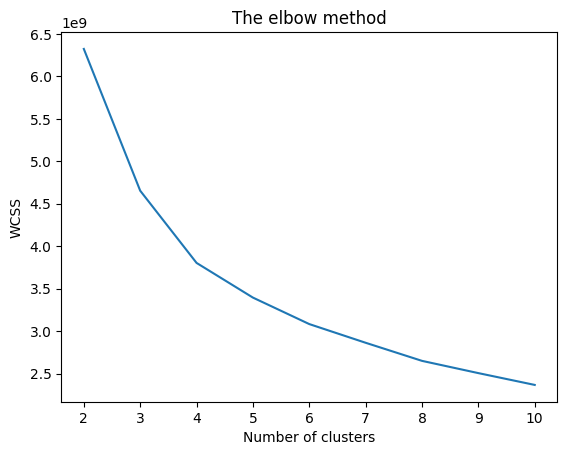

In [30]:
import matplotlib.pyplot as plt
# graficamos el método del codo
plt.plot(range(2,11), lista)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')   # within cluster sum of squares
plt.show()


In [31]:
# Planteamos nuestro modelo de KMeans con 6 clusters, especificando el número máximo de inicializaciones aleatorias (n_init),
# el número máximo de iteraciones (max_iter), el método de inicialización ('k-means++') y una semilla aleatoria fija.
km = KMeans(n_clusters=3, n_init=100, max_iter=1000, init='k-means++', random_state=5)

# Ajustamos el modelo a los datos y predecimos a qué cluster pertenece cada muestra.
pred = km.fit_predict(GAMES)

# Imprimimos las asignaciones de cluster para cada cliente.
print(pred)

[1 1 2 ... 1 1 1]
